<a href="https://colab.research.google.com/github/Yan-Erin/ML-AI-MiniProjects/blob/main/Lab2HeatTransferinNuclearFuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Drive Setup
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('/content/gdrive/MyDrive')
# Basic libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Main ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# Processing Functions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
seed=1




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Exercise 1 Data analysis
url='https://raw.githubusercontent.com/MajdiRadaideh/S097data/main/heat.csv'
data = pd.read_csv(url)
colnames= data.columns
npdata = np.array(data.values)
x= npdata[:,0:7]
y=npdata[:,-1]
xtrain =x[0:900,:]
ytrain=y[0:900]
xtest = x[900:,:]
ytest =y[900:]

xscaler = StandardScaler()
yscaler = StandardScaler()
Xtrain = xscaler.fit_transform(xtrain)
Xtest = xscaler.transform(xtest)
Ytrain = yscaler.fit_transform(ytrain.reshape(-1,1))
Ytest = yscaler.transform(ytest.reshape(-1,1)).flatten()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE= 0.05029845586235562 RMSE= 0.06347049330743737 R2= 0.9960037886016863
MAE= 0.29290416771339334 RMSE= 0.35701981538909466 R2= 0.8735585845696308
MAE= 0.34720802652846783 RMSE= 0.4021141084168998 R2= 0.8396003824699341


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


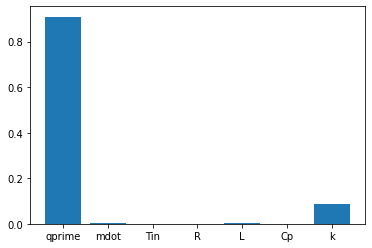

In [ ]:
#Exercise 2 Machine Learning with Scikit-Learn

rf_model = RandomForestRegressor(max_features = 6 )
rf_model.fit(Xtrain,Ytrain)
Yrf = rf_model.predict(Xtest)
rf_mae = mean_absolute_error(Ytest,Yrf)
rf_rmse = np.sqrt(mean_squared_error(Ytest,Yrf))
rf_r2 = r2_score(Ytest,Yrf)
print('MAE=',rf_mae, 'RMSE=',rf_rmse, 'R2=', rf_r2)
plt.bar(colnames[:7],rf_model.feature_importances_)

svm_model = SVR(kernel='rbf', C=1.1, epsilon=0.2)
svm_model.fit(Xtrain,Ytrain)
svm_Ypred = svm_model.predict(Xtest)
svm_mae = mean_absolute_error(Ytest,svm_Ypred)
svm_rmse = np.sqrt(mean_squared_error(Ytest,svm_Ypred))
svm_r2 = r2_score(Ytest,svm_Ypred)
print('MAE=',svm_mae, 'RMSE=',svm_rmse, 'R2=', svm_r2)

lr_model = LinearRegression(normalize=False)
lr_model.fit(Xtrain,Ytrain)
lr_Ypred = lr_model.predict(Xtest)
lr_mae = mean_absolute_error(Ytest,lr_Ypred)
lr_rmse = np.sqrt(mean_squared_error(Ytest,lr_Ypred))
lr_r2 = r2_score(Ytest,lr_Ypred)
print('MAE=',lr_mae, 'RMSE=',lr_rmse, 'R2=', lr_r2)




In [ ]:
# Exercise Set 4: Feedforward Neural Networks in Keras
model = Sequential()
model.add(Dense(200, activation="relu", input_dim= Xtrain.shape[1])) 
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_absolute_error', optimizer=Adam(5e-4), metrics=['mean_absolute_error'])
model.summary()
history=model.fit(Xtrain, Ytrain, epochs=100, batch_size=32, validation_split = 0.15, verbose=True)
ynn= model.predict(Xtest)
ynn=yscaler.inverse_transform(ynn)
mae=mean_absolute_error(ytest,ynn)
r2=r2_score(ytest,ynn)
print('MAE=',mae, 'R2=', r2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               1600      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 26,801
Trainable params: 26,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 0.8778 - mean_absolute_error: 0.8778 - val_loss: 0.5569 - val_mean_absolute_error: 0.5569
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4429 - me